In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
import pandas as pd

# Path to the dataset
file_path = r"C:\Users\ashli\Downloads\magic+gamma+telescope\magic04.data"

# Define column names (as per the UCI dataset description)
column_names = [
    "fLength", "fWidth", "fSize", "fConc", "fConc1",
    "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"
]

# Load the dataset
df = pd.read_csv(file_path, header=None, names=column_names)

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Display dataset info
print("\nDataset Information:")
print(df.info())

# Check for class distribution
print("\nClass Distribution:")
print(df['class'].value_counts())

# Replace the class labels (optional, for better understanding)
df['class'] = df['class'].replace({'g': 'gamma', 'h': 'hadron'})

# Display the updated class labels
print("\nUpdated Class Labels:")
print(df['class'].value_counts())


First 5 rows of the dataset:
    fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3

In [3]:
column_names = [
    "fLength", "fWidth", "fSize", "fConc", "fConc1",
    "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"
]
df= pd.read_csv(r"C:\Users\ashli\Downloads\magic+gamma+telescope\magic04.data", header= None, names=column_names)
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [4]:
df["class"]= (df["class"]=="g").astype(int)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


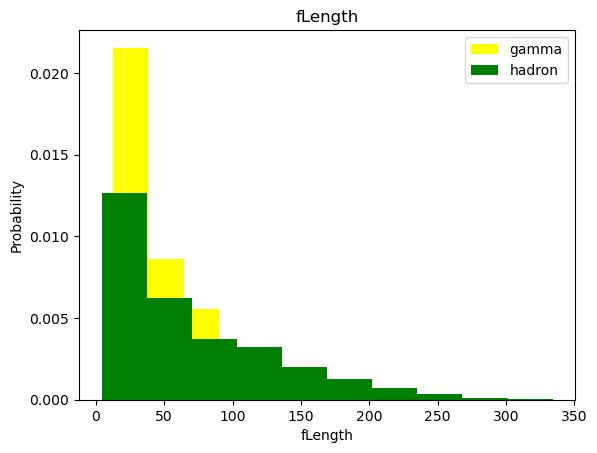

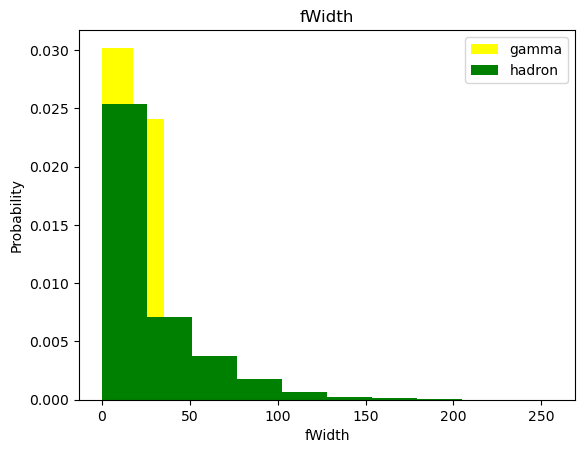

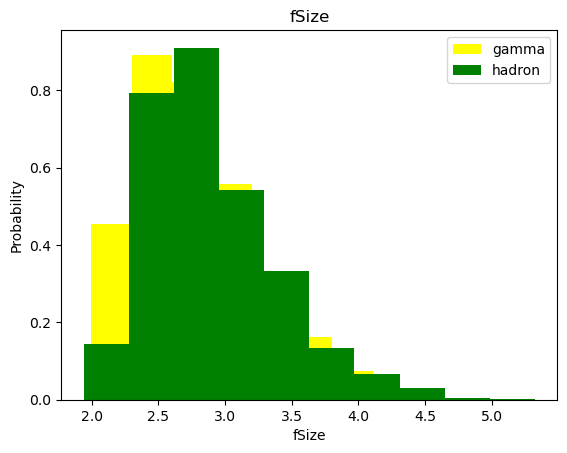

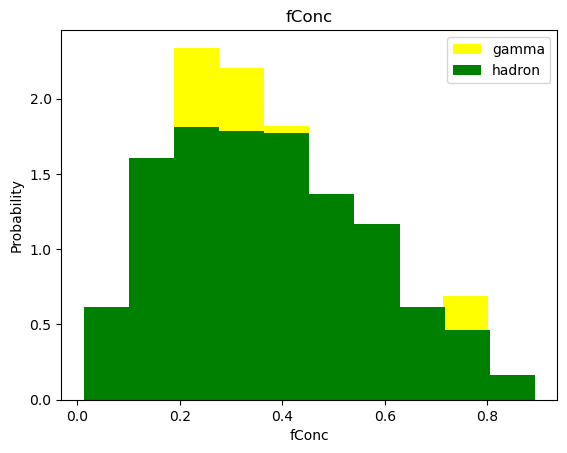

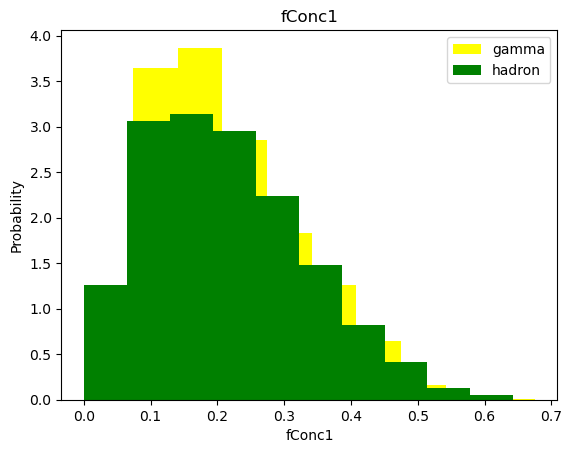

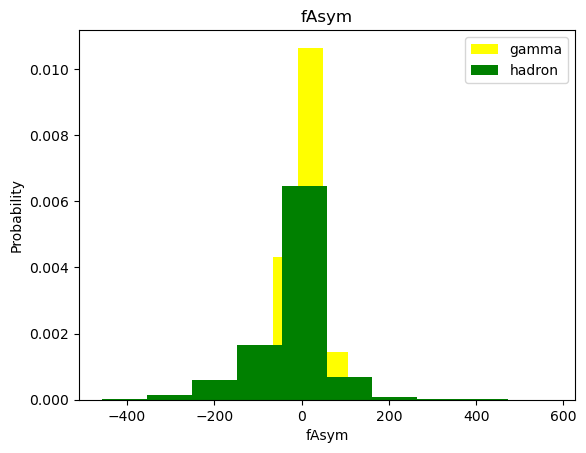

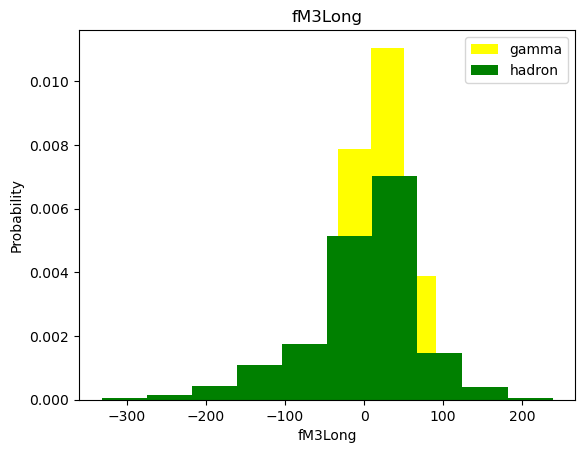

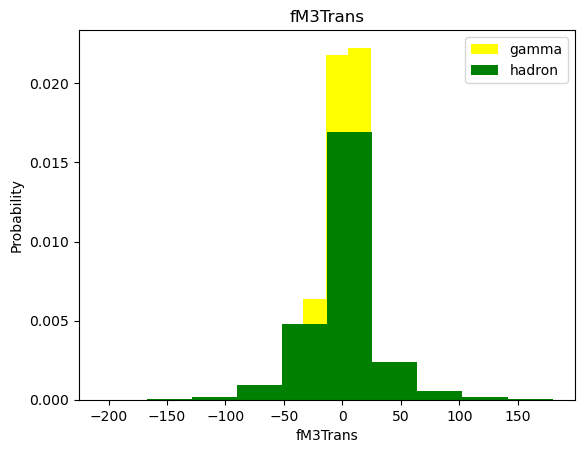

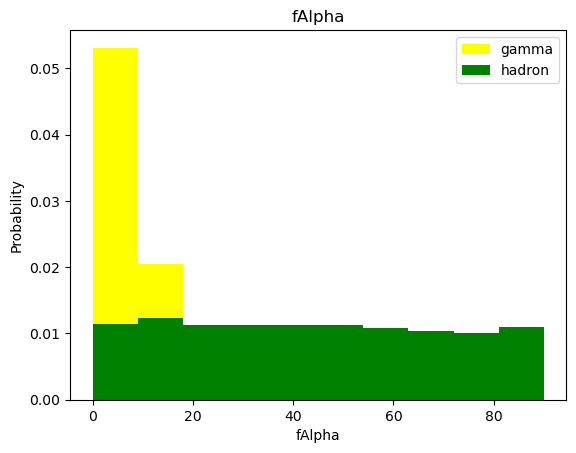

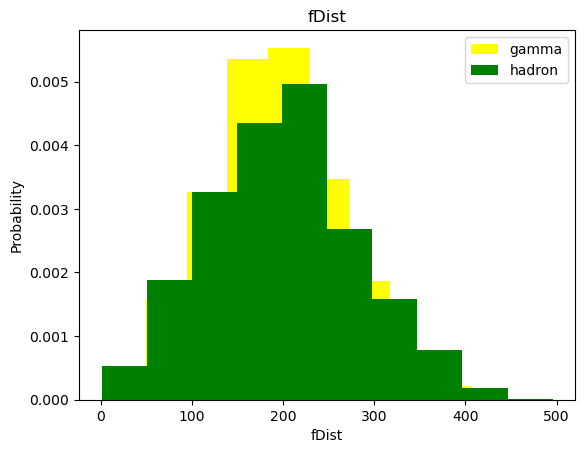

In [9]:
for label in column_names[:-1]:
    plt.hist(df[df["class"]==1][label], color="yellow", label="gamma", density= True)
    plt.hist(df[df["class"]==0][label], color="green", label="hadron", density= True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()


In [58]:
train, valid, test= np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

#frac=1 : if we are sampling all data, this will help in shuffling rows of the df. frac=1 means you are taking 100% of the data, but in a shuffled order.
#[int(0.6*len(df)), i-- first split will be 60%
#int(0.8*len(df))-- everything between 60 to 80 per cent will go for vallidation, and 80 to 100 will be test data
# These are the split points for dividing the DataFrame.
# int(0.6*len(df)): This calculates 60% of the length of df, marking the end of the training set.
# int(0.8*len(df)): This calculates 80% of the length of df, marking the end of the validation set and the start of the test set.


# Resulting Splits:

# train: Contains the first 60% of the shuffled DataFrame.
# valid: Contains the next 20% (from 60% to 80%).
# test: Contains the remaining 20% (from 80% to 100%).



C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Shuffling ensures that the data is randomized, which is important to avoid bias when splitting into training, validation, and test sets.


In [61]:
def scale_dataset(dataframe, oversample= False):
    x= dataframe[dataframe.columns[:-1]].values #assuming labels will be the last column
    y= dataframe[dataframe.columns[-1]].values

    scaler= StandardScaler()
    x= scaler.fit_transform(x) 
    #take x, fit the standard scaler to x and transform all the values, and that will be new x
    # Fits the scaler to x (computes the mean and standard deviation of each feature) and transforms x by applying standardization.

    #since y is much less than x

    if oversample:
        ros= RandomOverSampler()
        x,y= ros.fit_resample(x,y) #this will take more of the less class, and will keep sampling from there to increase the size of the dataset from that class to match
    
    data= np.hstack ((x, np.reshape(y,(-1,1))))                      #horizontally stack two arrays

    return data, x, y
    

In [63]:
print (len(train[train["class"]==1]))
print (len(train[train["class"]==0]))

7396
4016


In [65]:
train, x_train, y_train= scale_dataset(train, oversample= True)
valid, x_train, y_train= scale_dataset(valid, oversample= False)
test, x_train, y_train= scale_dataset(test, oversample= False)  #dont want oversampling in valid and test data

In [67]:
len(y_train)

3804